## STEP 1: Import library

In [1]:
import pandas as pd

import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
import squarify
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px

## STEP 2: Import Data

In [2]:
# Load the CSV with ISO-8859-1 encoding
retail_df = pd.read_csv("datasets/OnlineRetail.csv", sep=",", encoding='ISO-8859-1')
retail_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


## STEP 3: Data cleaning

In [3]:
# Review dimension of data set
print("Number of datapoints: ", len(retail_df))
print("Data shape:", retail_df.shape)

Number of datapoints:  541909
Data shape: (541909, 8)


In [4]:
# Display infomation
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Percentage of the missing value contributed in Data Frame
null_percentage = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
null_percentage

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
# Check for duplicates
print(f"Number of Duplicate variables: {retail_df.duplicated().sum()}")

# Drop duplicates in place
retail_df.drop_duplicates(inplace=True)
retail_df.dropna(inplace=True)

retail_df

Number of Duplicate variables: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [8]:
# Convert InvoiceDate into datetime
# retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M', dayfirst=True)
# retail_df
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M', dayfirst=True)
retail_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [10]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


Correlation

<Axes: >

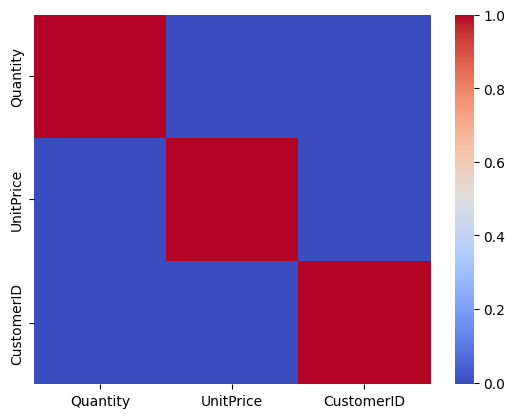

In [11]:
# Select only numeric columns
numeric_cols = retail_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corrDf = numeric_cols.corr()

# Plot the heatmap
sns.heatmap(corrDf, 
        xticklabels=corrDf.columns,
        yticklabels=corrDf.columns, cmap='coolwarm')

Invoice contains C speciality

In [12]:
df = retail_df.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
df_cleaned = retail_df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  retail_df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = retail_df[(retail_df['CustomerID'] == col['CustomerID']) &
                         (retail_df['StockCode']  == col['StockCode']) & 
                         (retail_df['InvoiceDate'] < col['InvoiceDate']) & 
                         (retail_df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

nb of entries to delete: 48


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
77598,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2011-01-31 16:26:00,0.65,15358.0,United Kingdom,0
90444,C544038,22784,LANTERN CREAM GAZEBO,-4,2011-02-15 11:32:00,4.95,14659.0,United Kingdom,0
111968,C545852,22464,HANGING METAL HEART LANTERN,-5,2011-03-07 13:49:00,1.65,14048.0,United Kingdom,0
116064,C546191,47566B,TEA TIME PARTY BUNTING,-35,2011-03-10 10:57:00,0.70,16422.0,United Kingdom,0
132642,C547675,22263,FELT EGG COSY LADYBIRD,-49,2011-03-24 14:07:00,0.66,17754.0,United Kingdom,0


In [14]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34


In [15]:
print(f"Total transactions after cleaning: {len(df_cleaned)}")

Total transactions after cleaning: 392857


## STEP 4: Data explore

<b> 4.1 Countries </b>

In [16]:
temp = df_cleaned[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop=False)

countries = temp['Country'].value_counts()
data = dict(type = 'choropleth', locations = countries.index, locationmode = 'country names', z = countries, text = countries.index, colorbar = {'title':'Scale'},colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False )

#_______________________
layout = dict(title='Number of orders per country',geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

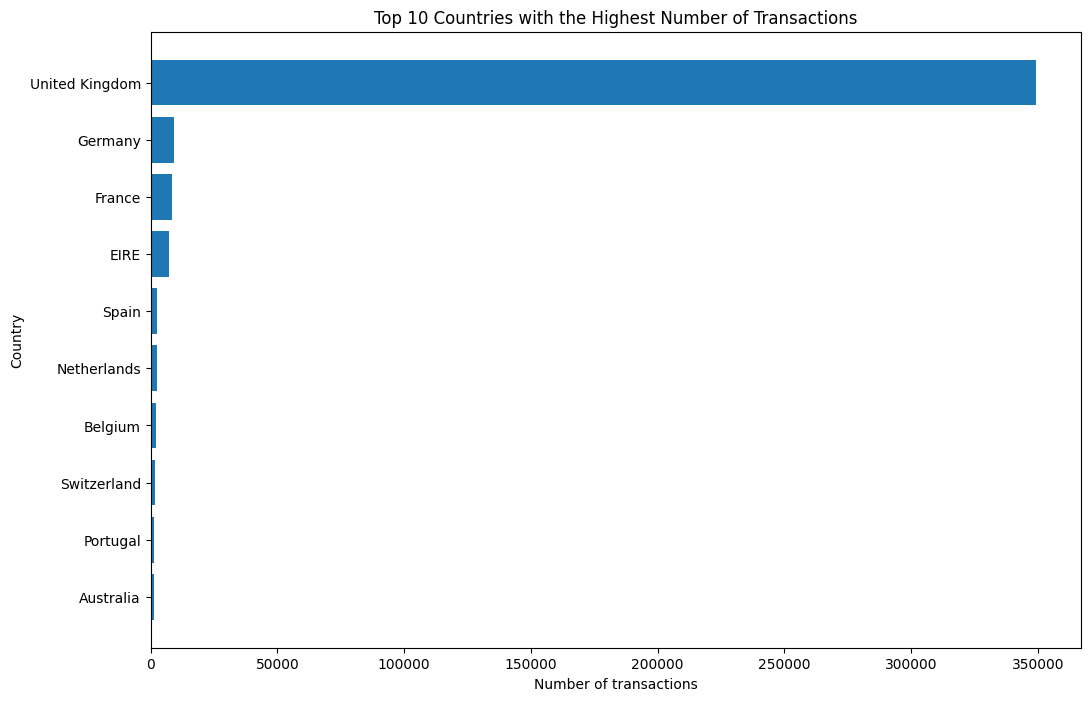

In [17]:
country_descibe = df_cleaned['Country'].value_counts()

top_10_desc = country_descibe[:10]
plt.figure(figsize=(12,8))
plt.barh(top_10_desc.index[::-1], top_10_desc.values[::-1])

plt.xlabel('Number of transactions')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Number of Transactions')

plt.show()

In [18]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,74215,0.0
148288,549222,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-04-07 10:43:00,4.25,12347.0,Iceland,0,17.0
428971,573511,22698,PINK REGENCY TEACUP AND SAUCER,12,2011-10-31 12:25:00,2.95,12347.0,Iceland,0,35.4
428970,573511,47559B,TEA TIME OVEN GLOVE,10,2011-10-31 12:25:00,1.25,12347.0,Iceland,0,12.5
428969,573511,47567B,TEA TIME KITCHEN APRON,6,2011-10-31 12:25:00,5.95,12347.0,Iceland,0,35.7
...,...,...,...,...,...,...,...,...,...,...
198734,554065,22064,PINK DOUGHNUT TRINKET POT,12,2011-05-22 10:39:00,1.65,18287.0,United Kingdom,0,19.8
198735,554065,21232,STRAWBERRY CERAMIC TRINKET BOX,12,2011-05-22 10:39:00,1.25,18287.0,United Kingdom,0,15.0
198736,554065,22644,CERAMIC CHERRY CAKE MONEY BANK,12,2011-05-22 10:39:00,1.45,18287.0,United Kingdom,0,17.4
198738,554065,21556,CERAMIC STRAWBERRY MONEY BOX,12,2011-05-22 10:39:00,2.55,18287.0,United Kingdom,0,30.6


Conclusion


## STEP 5: Data preparation

We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

### 1. Recency (R) = khoảng thời gian tinh từ lần cuối gd tới hiện tại

In [19]:
# Prepararion for Recency
max_date = max(df_cleaned['InvoiceDate']) 
print('The last purchased: ' ,max_date)

# Create a column name Diff
df_cleaned['Diff'] = max_date - df_cleaned['InvoiceDate']
df_cleaned.head(10)

The last purchased:  2011-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34,373 days 04:24:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0,15.30,373 days 04:24:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0,25.50,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,11.10,373 days 04:22:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,11.10,373 days 04:22:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,54.08,373 days 04:16:00


In [20]:
# Group by 'CustomerID' and 'Diff' to calculate min purchase recency
recency_df = df_cleaned.groupby('CustomerID')['Diff'].min().reset_index()


#Rename
recency_df.columns = ['CustomerID', 'Diff']

# Convert Diff column to show only days
recency_df['Diff'] = recency_df['Diff'].dt.days


recency_df.head()


,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


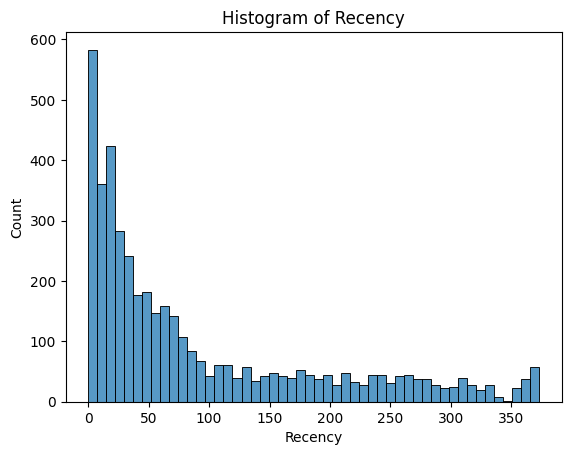

In [21]:
sns.histplot(data = recency_df, x='Diff', bins=50)
plt.xlabel("Recency")
plt.title('Histogram of Recency')
plt.show()

### 2. Frequency: Tần suất giao dich của khách hàng với doanh nghiệp là bao nhiêu

In [22]:
# Prepararion for Frequancy
# Group by 'CustomerID' and count 'InvoiceNo' to calculate purchase frequency
frequency_df = df_cleaned.groupby('CustomerID')['InvoiceNo'].count().reset_index()

# Rename the columns for clarity
frequency_df.columns = ['CustomerID', 'Frequency']

frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


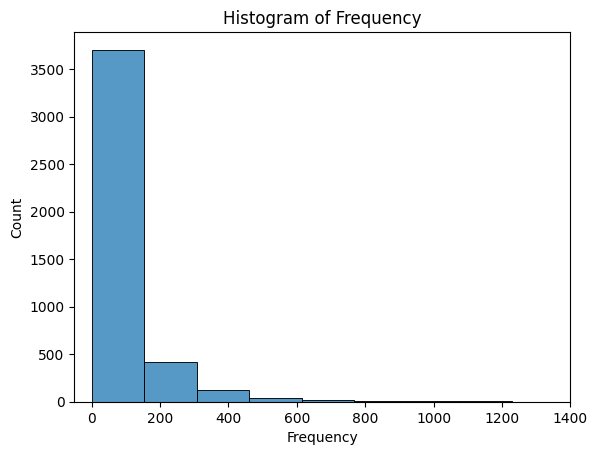

In [23]:
sns.histplot(data = frequency_df, x='Frequency', bins=50)
plt.xlim(-50,1400)
plt.title('Histogram of Frequency')
plt.show()

### 3. Monetary: Tổng số tién khách hàng đã chi tiêu cho thương hiệu trong một khoảng thời gian cụ thể là bao nhiêu

In [24]:
# Prepararion for Monetary
monetary_df = df_cleaned.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Total']
monetary_df

,CustomerID,Total
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,176.60
4337,18283.0,2045.53


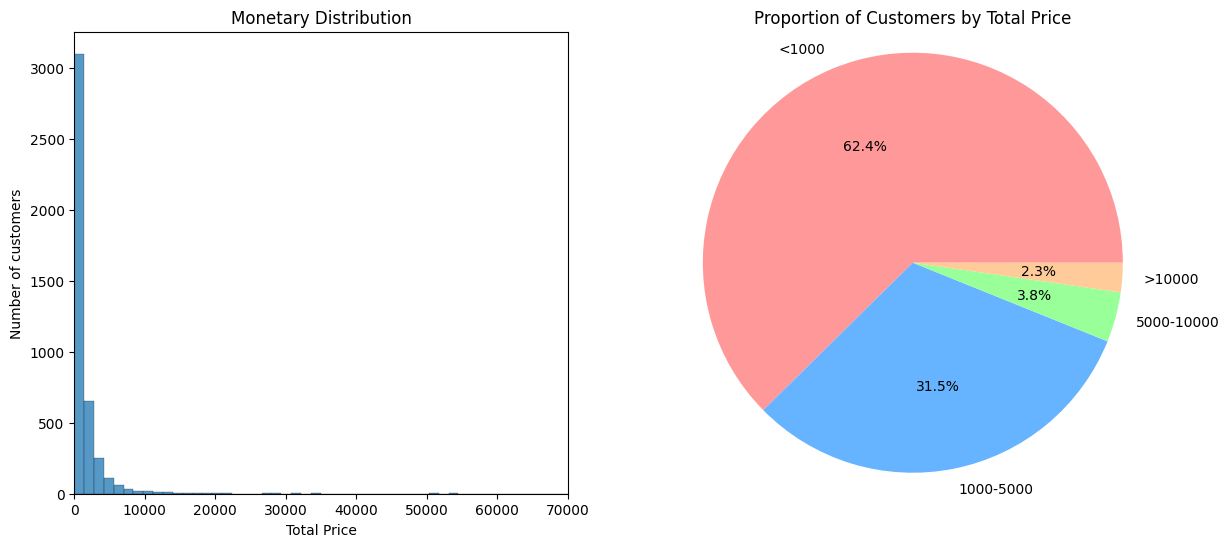

In [25]:
segments = pd.cut(monetary_df['Total'], bins=[-1, 1000, 5000, 10000, float('inf')], labels=['<1000', '1000-5000', '5000-10000', '>10000'])

# Create a pie chart for the segments
segment_counts = segments.value_counts()

# Plotting the pie chart
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.histplot(data = monetary_df, x='Total', bins=200)
plt.xlabel("Total Price")
plt.title('Monetary Distribution')
plt.ylabel("Number of customers")
plt.xlim(0,70000)

plt.subplot(1,2,2)
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=0, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Proportion of Customers by Total Price')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 4. Merge Recency, Frequency, Montary data frame into 1 general data frame

In [26]:
rfm_1 = pd.merge(recency_df, frequency_df, how='inner', on='CustomerID')
rfm_2 = pd.merge(rfm_1, monetary_df,how='inner',on='CustomerID')
#Rename
rfm_2.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_2.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [27]:
rfm_2[rfm_2["Monetary"]==rfm_2["Monetary"].max()]

,CustomerID,Recency,Frequency,Monetary
1690,14646.0,1,2081,279558.62


### 5. Check outliers using box plot

Recency: Lower limit = -461.5, Upper limit = 774.5
Frequency: Lower limit = -452.0, Upper limit = 764.0
Monetary: Lower limit = -7771.871249999994, Upper limit = 13243.482749999988


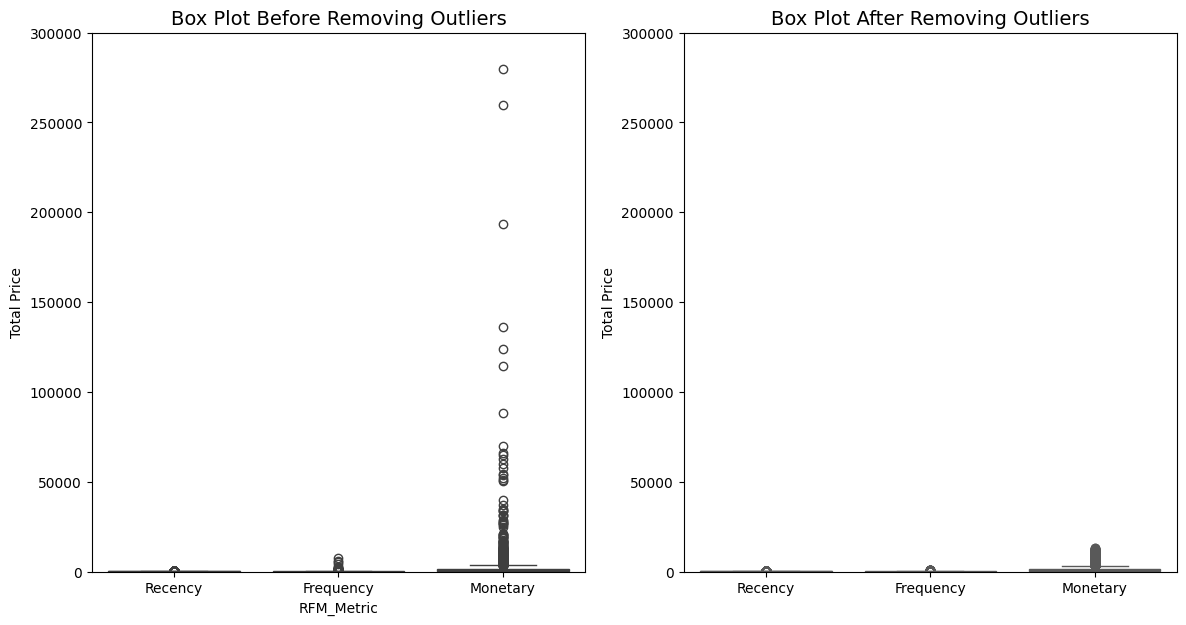

      CustomerID  Recency  Frequency  Monetary
0        12346.0      325          1      0.00
1        12347.0        1        182   4310.00
2        12348.0       74         31   1797.24
3        12349.0       18         73   1757.55
4        12350.0      309         17    334.40
...          ...      ...        ...       ...
4334     18280.0      277         10    180.60
4335     18281.0      180          7     80.82
4336     18282.0        7         12    176.60
4337     18283.0        3        721   2045.53
4338     18287.0       42         70   1837.28

[4258 rows x 4 columns]


In [28]:
def remove_outliers(df, columns):
    # For each column, calculate Q1, Q3, and filter the data
    for column in columns:
        Q1 = df[column].quantile(0.05)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Print the lower and upper limits for each column
        print(f"{column}: Lower limit = {lower_limit}, Upper limit = {upper_limit}")
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

# Apply the function to remove outliers from the 'Recency', 'Frequency', and 'Monetary' columns
columns_filter = ['Recency', 'Frequency', 'Monetary']
rfm_cleaned = remove_outliers(rfm_2, columns_filter)

rfm_melted = rfm_2.melt(id_vars='CustomerID', value_vars=['Recency', 'Frequency', 'Monetary'], 
                         var_name='RFM_Metric', value_name='Total Price')
# Create the box plot
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x='RFM_Metric', y='Total Price', data=rfm_melted)
# Set plot labels and title
plt.title('Box Plot Before Removing Outliers', fontsize=14)
plt.ylabel('Total Price')
plt.ylim(0,300000)

plt.subplot(1,2,2)
sns.boxplot(data=rfm_cleaned[columns_filter], palette="Set2")
plt.title("Box Plot After Removing Outliers", fontsize=14)
plt.ylabel("Total Price")
plt.ylim(0,300000)

plt.show()

print(rfm_cleaned)


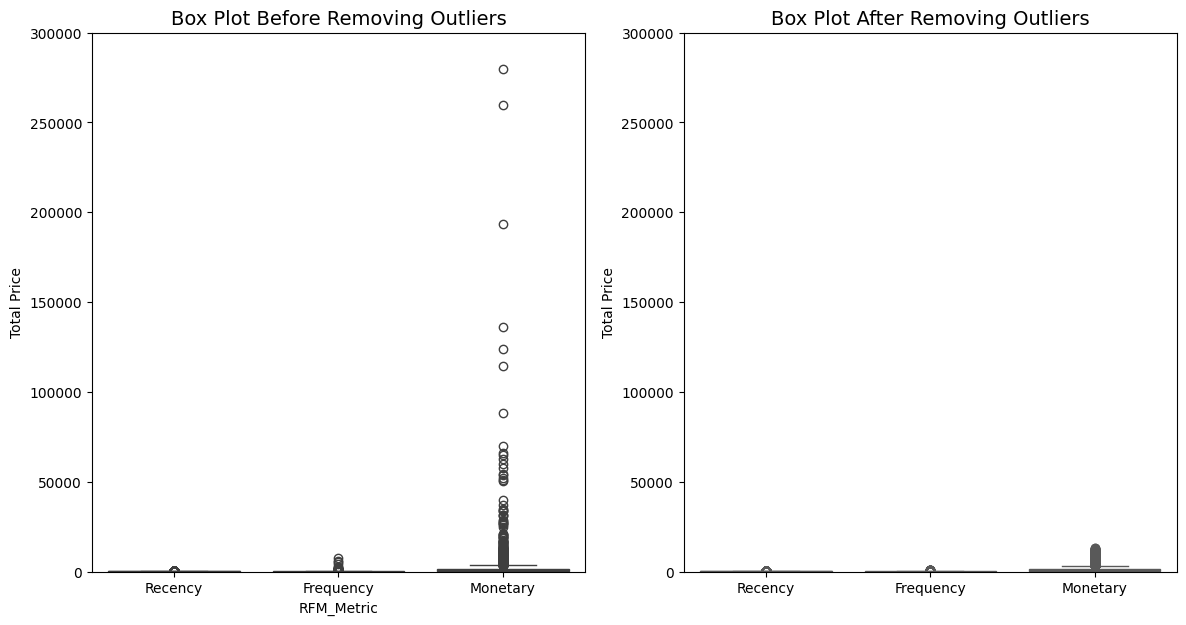

      CustomerID  Recency  Frequency  Monetary
0        12346.0      325          1      0.00
1        12347.0        1        182   4310.00
2        12348.0       74         31   1797.24
3        12349.0       18         73   1757.55
4        12350.0      309         17    334.40
...          ...      ...        ...       ...
4334     18280.0      277         10    180.60
4335     18281.0      180          7     80.82
4336     18282.0        7         12    176.60
4337     18283.0        3        721   2045.53
4338     18287.0       42         70   1837.28

[4258 rows x 4 columns]


In [29]:
def remove_outliers(df, columns):
    # For each column, calculate Q1, Q3, and filter the data
    for column in columns:
        Q1 = df[column].quantile(0.05)
        Q3 = df[column].quantile(0.95)
        IQR = Q3 - Q1
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    
    return df

# Apply the function to remove outliers from the 'Total', 'Recency', and 'Frequency' columns
columns_filter = ['Recency', 'Frequency', 'Monetary']
rfm_cleaned = remove_outliers(rfm_2, columns_filter)

rfm_melted = rfm_2.melt(id_vars='CustomerID', value_vars=['Recency', 'Frequency', 'Monetary'], 
                         var_name='RFM_Metric', value_name='Total Price')
# Create the box plot
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
sns.boxplot(x='RFM_Metric', y='Total Price', data=rfm_melted)
# Set plot labels and title
plt.title('Box Plot Before Removing Outliers', fontsize=14)
plt.ylabel('Total Price')
plt.ylim(0,300000)

plt.subplot(1,2,2)
sns.boxplot(data=rfm_cleaned[columns_filter], palette="Set2")
plt.title("Box Plot After Removing Outliers", fontsize=14)
plt.ylabel("Total Price")
plt.ylim(0,300000)

plt.show()

print(rfm_cleaned)


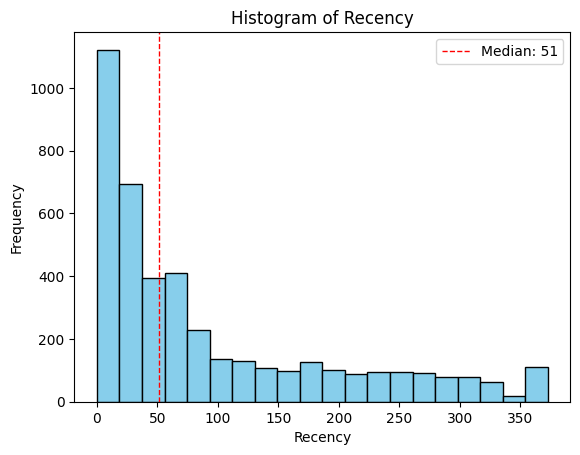

In [30]:
# Assuming rfm_score_cleaned['Recency'] is your data
data = rfm_cleaned['Recency']

# Calculate the median
median = np.median(data)

# Plot the histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')

# Add a vertical line at the median
plt.axvline(median, color='red', linestyle='dashed', linewidth=1, label=f'Median: {int(median)}')

# Add labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Histogram of Recency')
plt.legend()

# Show plot
plt.show()

## 6. Standard scaler for clustering task

The Standard Scaler is a data preprocessing technique that transforms features by scaling them to have a mean of 0 and a standard deviation of 1. It’s widely used in machine learning, especially for algorithms that are sensitive to the scale of data. <br>

( in this task we will use to implement KMean )

Standard Scaling (also known as Z-score normalization) standardizes each feature by removing the mean and scaling it to unit variance. The transformation is given by the formula: <br>
$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

where:
- $x$ is the original feature value.
- $\mu$ is the mean of the feature values. (mean-0)
- $\sigma$ is the standard deviation of the feature values. (sigma-1)



In [31]:
rfm_df = rfm_cleaned[['Recency', 'Frequency', "Monetary"]]
rfm_df

,Recency,Frequency,Monetary
0,325,1,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40
...,...,...,...
4334,277,10,180.60
4335,180,7,80.82
4336,7,12,176.60
4337,3,721,2045.53


In [32]:
sc = StandardScaler()
rfm_scaled = sc.fit_transform(rfm_df.values)
rfm_scaled.shape

(4258, 3)

In [33]:
rfm_df_scaled = pd.DataFrame(rfm_scaled)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,2.314237,-0.761659,-0.740725
1,-0.917986,1.090210,1.764235
2,-0.189738,-0.454719,0.303826
3,-0.748394,-0.025004,0.280759
4,2.154621,-0.597958,-0.546372


## Section 1: RFM Score & Segmentation Customer Value Task 
(ignore the standard scaler part)

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

In [34]:
rfm_score_cleaned = rfm_cleaned.copy()
print(rfm_score_cleaned)

      CustomerID  Recency  Frequency  Monetary
0        12346.0      325          1      0.00
1        12347.0        1        182   4310.00
2        12348.0       74         31   1797.24
3        12349.0       18         73   1757.55
4        12350.0      309         17    334.40
...          ...      ...        ...       ...
4334     18280.0      277         10    180.60
4335     18281.0      180          7     80.82
4336     18282.0        7         12    176.60
4337     18283.0        3        721   2045.53
4338     18287.0       42         70   1837.28

[4258 rows x 4 columns]


In [35]:
rfm_score_cleaned.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

### METHOD 1: Scoring of Recency, Frequency and Monetary Values

In [36]:
rfm_score_cleaned['Recency_Score'] = pd.qcut(rfm_score_cleaned['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_score_cleaned['Frequency_Score'] = pd.qcut(rfm_score_cleaned['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_score_cleaned['Monetary_Score'] = pd.qcut(rfm_score_cleaned['Monetary'], 5, labels=[1,2,3,4,5])
rfm_score_cleaned

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,325,1,0.00,1,1,1
1,12347.0,1,182,4310.00,5,5,5
2,12348.0,74,31,1797.24,2,3,4
3,12349.0,18,73,1757.55,4,4,4
4,12350.0,309,17,334.40,1,2,2
...,...,...,...,...,...,...,...
4334,18280.0,277,10,180.60,1,1,1
4335,18281.0,180,7,80.82,2,1,1
4336,18282.0,7,12,176.60,5,1,1
4337,18283.0,3,721,2045.53,5,5,5


In [37]:
rfm_score_cleaned["RFM_SCORE"] = (rfm_score_cleaned['Recency_Score'].astype(str) + 
                    rfm_score_cleaned['Frequency_Score'].astype(str) + 
                    rfm_score_cleaned['Monetary_Score'].astype(str))


In [38]:
seg_map = {
    r'555|554|544|545|454|455|445': 'Champions',
    r'543|444|435|355|354|345|344|335': 'Loyal Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'512|511|422|421|412|411|311': 'Recent Customers',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'535|534|443|434|343|334|325|324': 'Customers Needing Attention',
    r'331|321|312|221|213': 'About To Sleep',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'155|154|144|214|215|115|114|113': "Can't Lose Them",
    r'332|322|231|241|251|233|232|223|222|132|123|122|121|212|211': 'Hibernating',
    r'111|112|121|131|141|151': 'Lost'
}

# Combine Recency_Score, Frequency_Score, and Monetary_Score to form RFM_SCORE
rfm_score_cleaned['RFM_SCORE'] = (
    rfm_score_cleaned['Recency_Score'].astype(str) +
    rfm_score_cleaned['Frequency_Score'].astype(str) +
    rfm_score_cleaned['Monetary_Score'].astype(str)
)

# Map the RFM_SCORE to the Segment column based on seg_map
rfm_score_cleaned['Segment'] = rfm_score_cleaned['RFM_SCORE'].replace(seg_map, regex=True)

# Display the updated DataFrame
rfm_score_cleaned.head()


,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment
0,12346.0,325,1,0.00,1,1,1,111,Lost
1,12347.0,1,182,4310.00,5,5,5,555,Champions
2,12348.0,74,31,1797.24,2,3,4,234,At Risk
3,12349.0,18,73,1757.55,4,4,4,444,Loyal Customers
4,12350.0,309,17,334.40,1,2,2,122,Hibernating


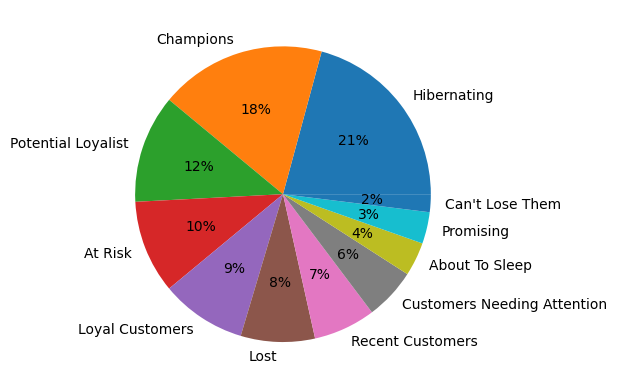

In [39]:
plt.pie(rfm_score_cleaned.Segment.value_counts(),
        labels=rfm_score_cleaned.Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

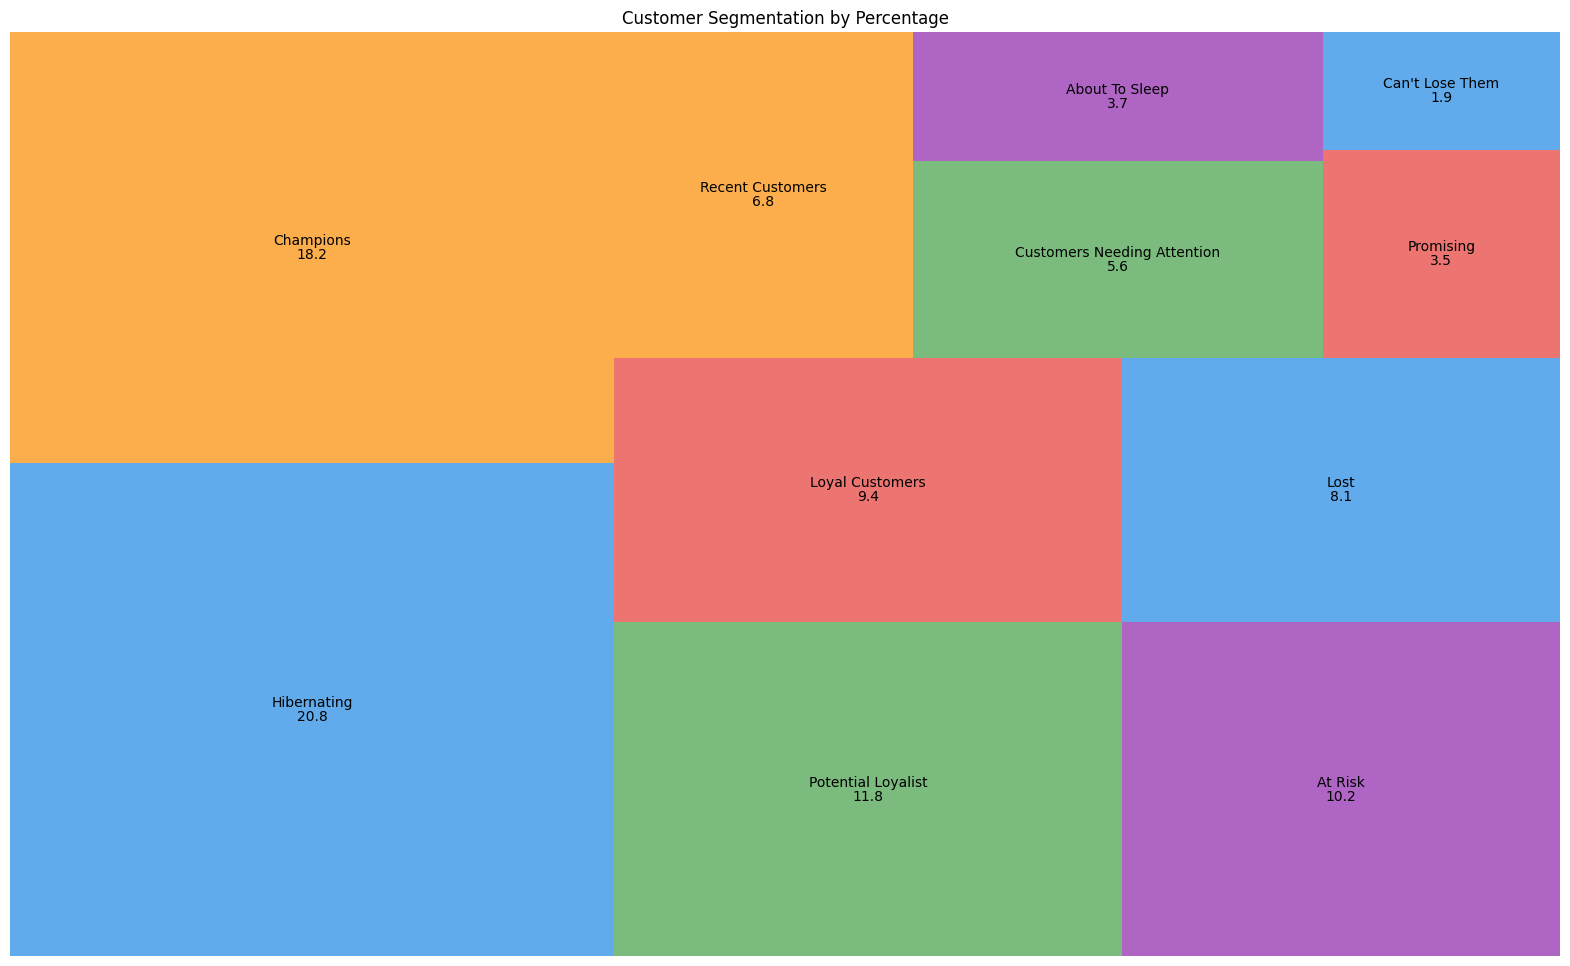

In [40]:
# Calculate the number of customers in each segment and their respective percentages
segment_counts = rfm_score_cleaned['Segment'].value_counts()
segment_sizes = (segment_counts / segment_counts.sum()) * 100  # Convert to percentage

# Define colors to match the segments in the treemap
colors = ['#1E88E5', '#FB8C00', '#43A047', '#8E24AA', '#E53935']

# Plotting the treemap with sizes based on segment percentages
plt.figure(figsize=(20, 12))
squarify.plot(sizes=segment_sizes, label=segment_sizes.index, color=colors, alpha=0.7, value=segment_sizes.round(1))
plt.axis('off')
plt.title('Customer Segmentation by Percentage')
plt.show()


In [41]:
Segment = rfm_score_cleaned['Segment'].value_counts()
fig = px.bar(x=Segment.index, 
             y=Segment.values,
             color=Segment.index,
             text=Segment.values,
             title="RFM Segments count")
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial"),
    xaxis=dict(tickangle=90) 
)
fig.show()

In [42]:
# Mean, median, count statistics of different segments
stats = rfm_score_cleaned[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])
stats

Recency                Frequency               \
                                   mean median count        mean median count   
Segment                                                                         
About To Sleep                83.656051   65.0   157   17.522293   15.0   157   
At Risk                      157.377880  132.0   434   77.248848   63.0   434   
Can't Lose Them              220.325301  217.0    83   53.253012   12.0    83   
Champions                     11.371613    9.0   775  209.658065  167.0   775   
Customers Needing Attention   33.020833   29.5   240   56.112500   49.0   240   
Hibernating                  160.311864  142.0   885   22.732203   21.0   885   
Lost                         280.127536  276.0   345    9.898551    8.0   345   
Loyal Customers               39.609023   40.0   399  115.541353   92.0   399   
Potential Loyalist            28.369048   24.0   504   58.625000   43.0   504   
Promising                     17.727891   10.0   147   16.346939   17.0   147   
Recent Customers              29.024221   24.0   289   10.404844    9.0   289   

                                Monetary                  
                                    mean    median count  
Segment                                                   
About To Sleep                288.535096   224.140   157  
At Risk                      1443.861705  1043.710   434  
Can't Lose Them              1511.887361  1250.370    83  
Champions                    3440.977290  2656.130   775  
Customers Needing Attention  1172.863542   980.745   240  
Hibernating                   356.442714   333.970   885  
Lost                          171.718609   155.900   345  
Loyal Customers              2044.524361  1635.660   399  
Potential Loyalist            550.170538   578.660   504  
Promising                    1073.958707   635.680   147  
Recent Customers              191.882561   176.600   289

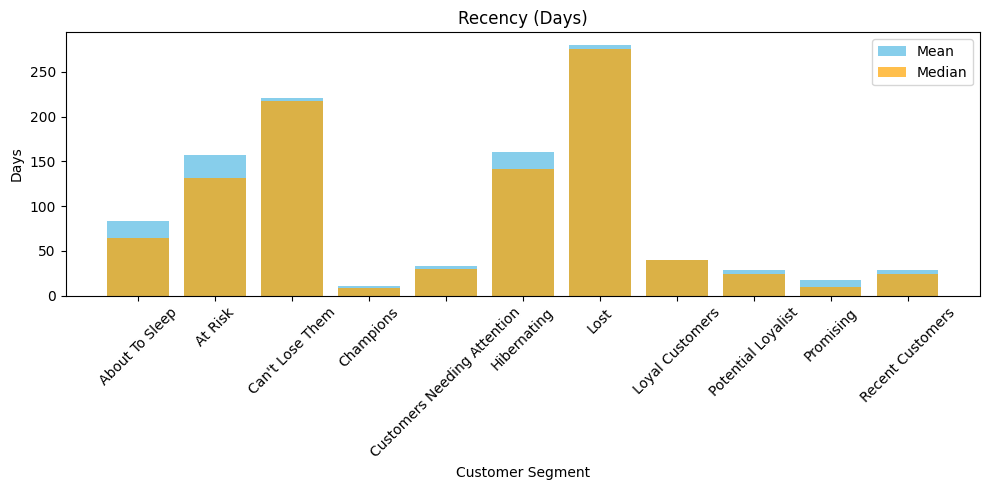

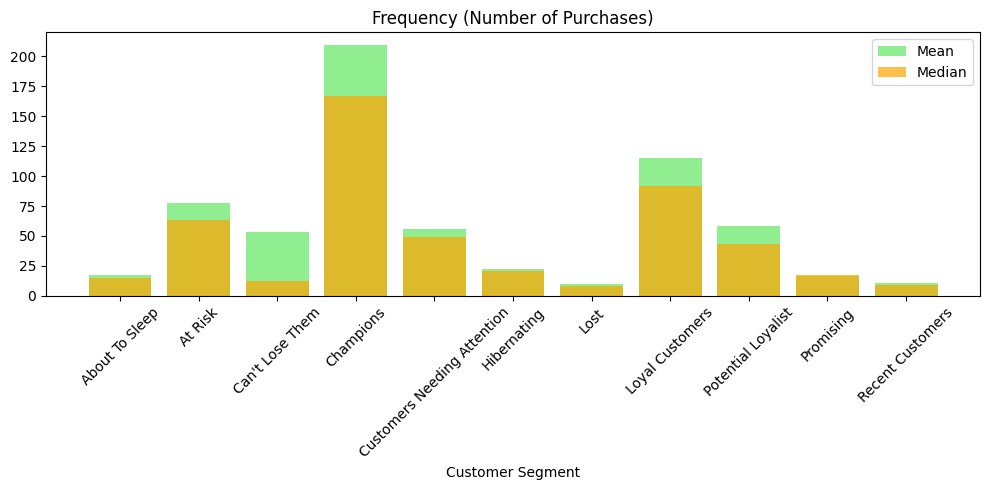

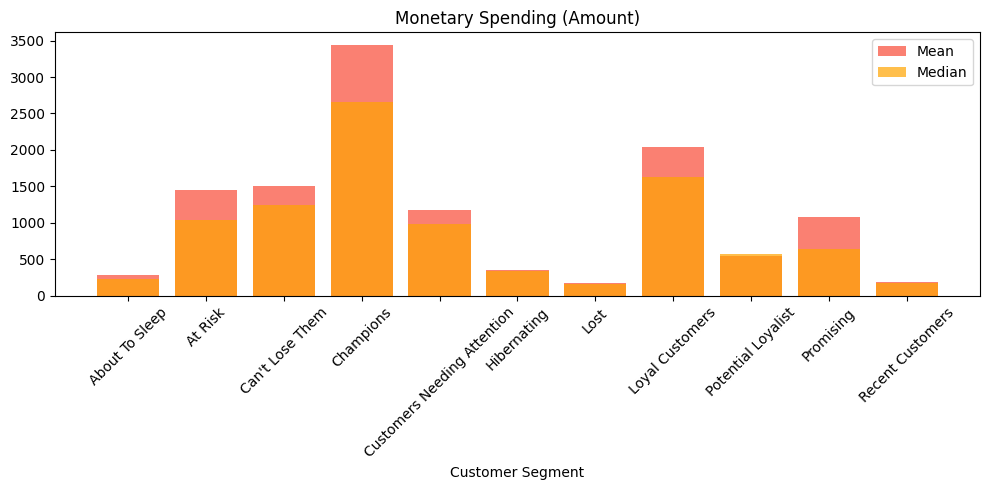

In [43]:
# Creating separate plots for each metric (Recency, Frequency, Total) for better clarity
# Customer segments
customer_segments = stats.index

# Recency mean and median
recency_means = stats[("Recency", "mean")]
recency_medians = stats[("Recency", "median")]

# Frequency mean and median
frequency_means = stats[("Frequency", "mean")]
frequency_medians = stats[("Frequency", "median")]

# Total Spending mean and median
total_means = stats[("Monetary", "mean")]
total_medians = stats[("Monetary", "median")]
# Plot for Recency
plt.figure(figsize=(10, 5))
plt.bar(customer_segments, recency_means, color='skyblue', label='Mean')
plt.bar(customer_segments, recency_medians, color='orange', label='Median', alpha=0.7)
plt.title('Recency (Days)')
plt.xlabel('Customer Segment')
plt.ylabel('Days')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Frequency
plt.figure(figsize=(10, 5))
plt.bar(customer_segments, frequency_means, color='lightgreen', label='Mean')
plt.bar(customer_segments, frequency_medians, color='orange', label='Median', alpha=0.7)
plt.title('Frequency (Number of Purchases)')
plt.xlabel('Customer Segment')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Total Spending
plt.figure(figsize=(10, 5))
plt.bar(customer_segments, total_means, color='salmon', label='Mean')
plt.bar(customer_segments, total_medians, color='orange', label='Median', alpha=0.7)
plt.title('Monetary Spending (Amount)')
plt.xlabel('Customer Segment')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I have determined several noticable categories for customer segmentation. This can be spotted out wherever the Retail company should implement a market strategy according to those segments.<br>
#

<b> Low Value Customer: </b> <br>
The shopping routine of this group shows a downturn trend, with their last purchase made an average of 93 days ago. The mean is higher than the median, indicating that some customers in this segment have a longer gap between purchases, which skews the average. This suggests that while some customers shop sporadically, a large portion of the group tends to shop more frequently (closer to 63 days). The time interval that has passed since the last purchase of this group is very high, so customers may be lost. The possible reason is that the customer dissatifaction. Their shopping experience is quite disappointing.Therefore we suggest the company to make a survey to improve the quality of shopping. Hence, it retains this group customer.


<b> High Value Customer: </b> <br>

link:https://www.kaggle.com/code/serkangzel/customer-segmentation-with-rfm-analysis#6.-Customer-Segmentation

## Section 2: KMean & Segmentation Customer Value Task 
( within standard scaler )

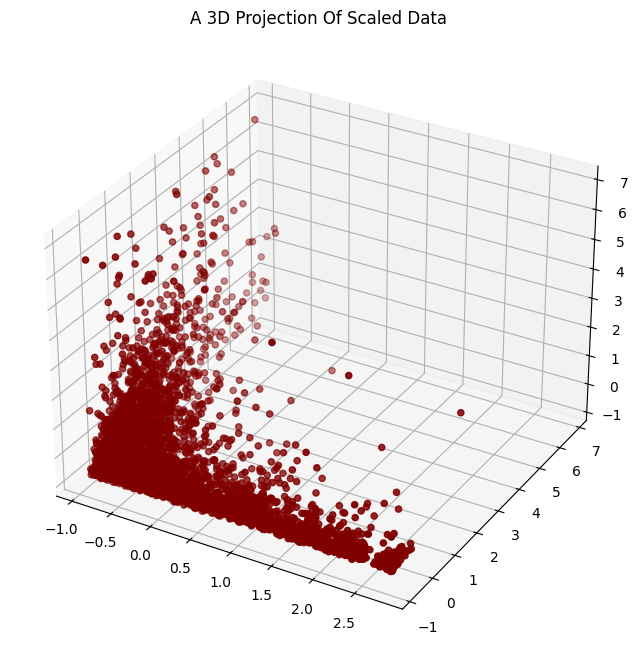

In [44]:
#A 3D Projection Of Data 
x =rfm_df_scaled["Recency"]
y =rfm_df_scaled["Frequency"]
z =rfm_df_scaled["Monetary"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Scaled Data")
plt.show()

### Elbow Method

[12774.000000000004, 7590.978765251908, 4403.7801267568475, 3348.4715196143597, 2792.579437833106, 2490.158543632643, 2100.602708395914, 1833.5975536694748, 1668.6342660430043]


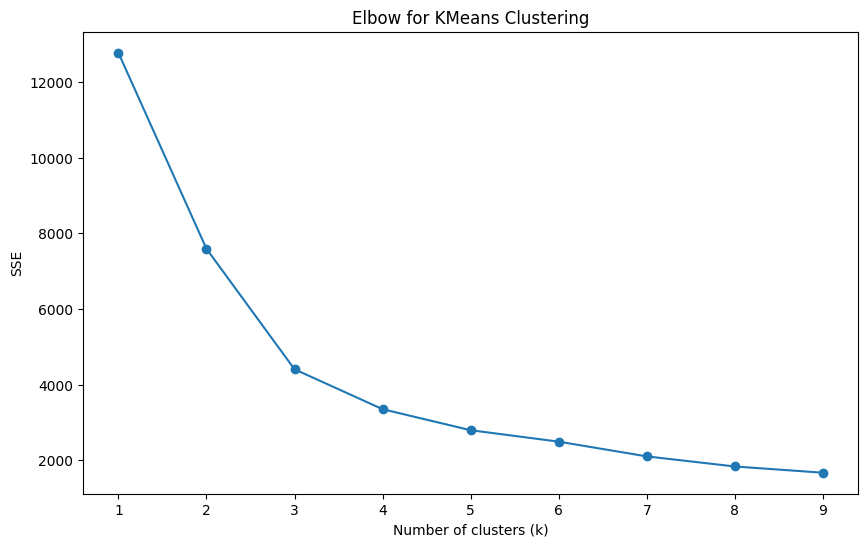

In [45]:
from sklearn.cluster import KMeans

# Hàm để tính SSE cho mỗi số lượng cụm
sse = []
K_range = range(1, 10)  # Thử nghiệm với số cụm từ 1 đến 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_scaled)
    sse.append(kmeans.inertia_)  # inertia_ là tổng SSE

print(sse)
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow for KMeans Clustering')
plt.show()

Elbow Method to determine the number of clusters to be formed:


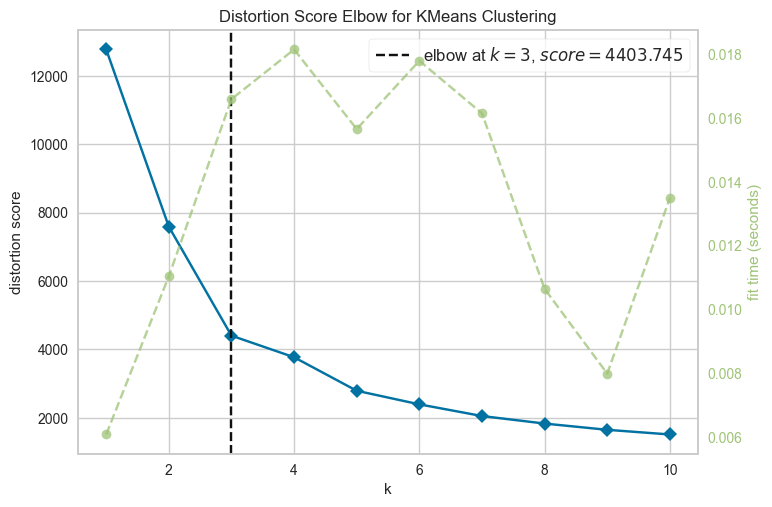

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=range(1, 11))
Elbow_M.fit(rfm_df_scaled)
Elbow_M.show()

### Silhouette Method

The silhouette score interpretation measures the quality of k means silhouette score by evaluating how well data points group within their assigned clusters compared to data points in other clusters.<br>

<b>Calculation:</b>

The silhouette score is calculated for each data point and then averaged across all data points. It considers two distances for each data point:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- \( s(i) \) is the silhouette score for the \( i \)-th sample.
- \( a(i) \) is the average distance between the \( i \)-th sample and all other points within the same cluster (intra-cluster distance).
- \( b(i) \) is the average distance between the \( i \)-th sample and all points in the nearest cluster that the data point doesn’t belong to (inter-cluster distance).


<b>NOTE:</b> The silhouette coefficient is not defined for a single cluster only.

The silhouette score ranges from -1 to 1:<br>

- 1: Ideally close data points within a cluster and far away from other clusters (good clustering).
- 0: Data points are on the border between clusters, indicating some overlap (average clustering).
- -1: Data points might be assigned to the wrong cluster (poor clustering).

For n_clusters=2, the silhouette score is 0.5408583184804224
For n_clusters=3, the silhouette score is 0.5084123539274809
For n_clusters=4, the silhouette score is 0.47991316094276826
For n_clusters=5, the silhouette score is 0.4681632295201755
For n_clusters=6, the silhouette score is 0.4302910754109288
For n_clusters=7, the silhouette score is 0.4085763136521778
For n_clusters=8, the silhouette score is 0.4076895110559514
For n_clusters=9, the silhouette score is 0.3683377418453027


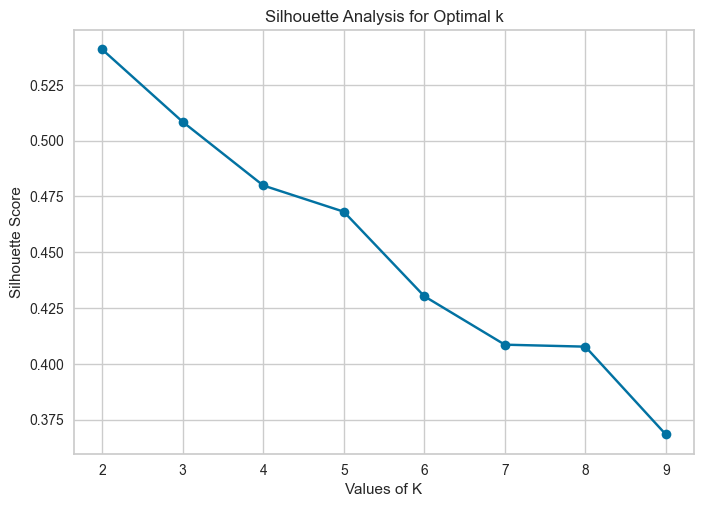

In [47]:
silhouette_avg = []
K_range = range(2, 10)  # Start from 2 because silhouette score is not defined for k=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    score = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette_avg.append(score)
    print("For n_clusters={}, the silhouette score is {}".format(k, score))

# Plot the silhouette scores for each k
plt.plot(K_range, silhouette_avg, marker='o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


### Final KMean model decision

In [74]:
# Final model with k=3
kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [75]:
kmeans_final.labels_

array([1, 2, 0, ..., 0, 2, 0])

In [76]:
rfm_df['Cluster_ID'] = kmeans_final.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Cluster_ID
0,325,1,0.00,1
1,1,182,4310.00,2
2,74,31,1797.24,0
3,18,73,1757.55,0
4,309,17,334.40,1


In [77]:
cluster0_df = rfm_df[rfm_df["Cluster_ID"]==0]
cluster1_df = rfm_df[rfm_df["Cluster_ID"]==1]
cluster2_df = rfm_df[rfm_df["Cluster_ID"]==2]
print(f"Count cluster 0: {len(cluster0_df)}")
print(f"Count cluster 1: {len(cluster1_df)}")
print(f"Count cluster 2: {len(cluster2_df)}")


Count cluster 0: 2710
Count cluster 1: 1054
Count cluster 2: 494


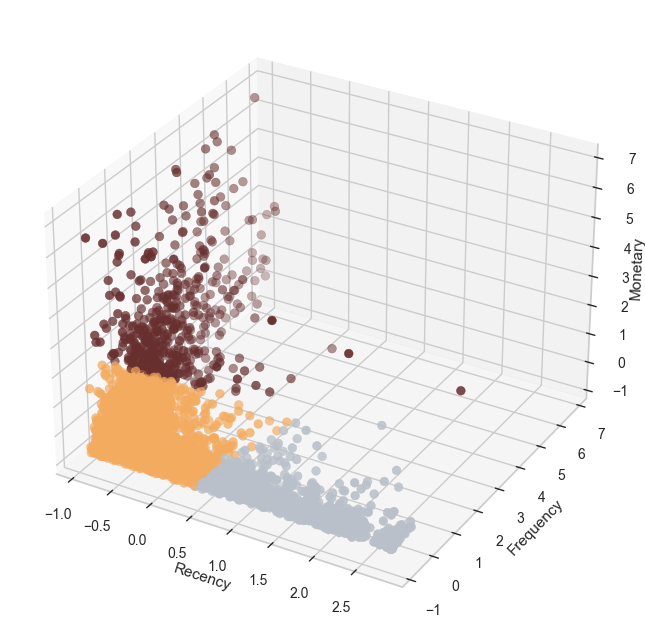

In [52]:
#Plotting the clusters

# x =rfm_df_scaled["Recency"]
# y =rfm_df_scaled["Frequency"]
# z =rfm_df_scaled["Monetary"]

from matplotlib import colors
cmap = colors.ListedColormap(["#682F2F","#B9C0C9", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="Cluster ID")
ax.scatter(x, y, z, s=40, c=rfm_df['Cluster_ID'], marker='o', cmap = cmap)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary",labelpad=-1)

plt.show()

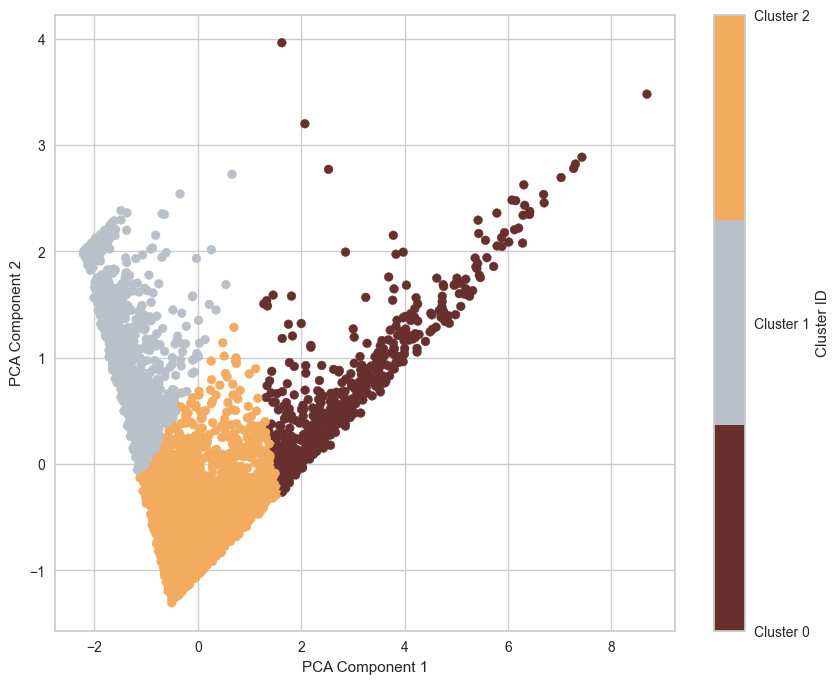

In [53]:
# Step 1: Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_df_scaled)

# Step 2: Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 3: Plot the clusters in the 2D PCA space
plt.figure(figsize=(10,8))
scatter = plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm_df['Cluster_ID'], cmap=cmap, s=40)

plt.xlabel(f'PCA Component 1')
plt.ylabel(f'PCA Component 2')
# Add a color bar to indicate cluster IDs
colorbar = plt.colorbar(scatter, ticks=[0, 1, 2])  # Adjust ticks based on your cluster IDs
colorbar.set_label('Cluster ID')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2']) 
plt.show()

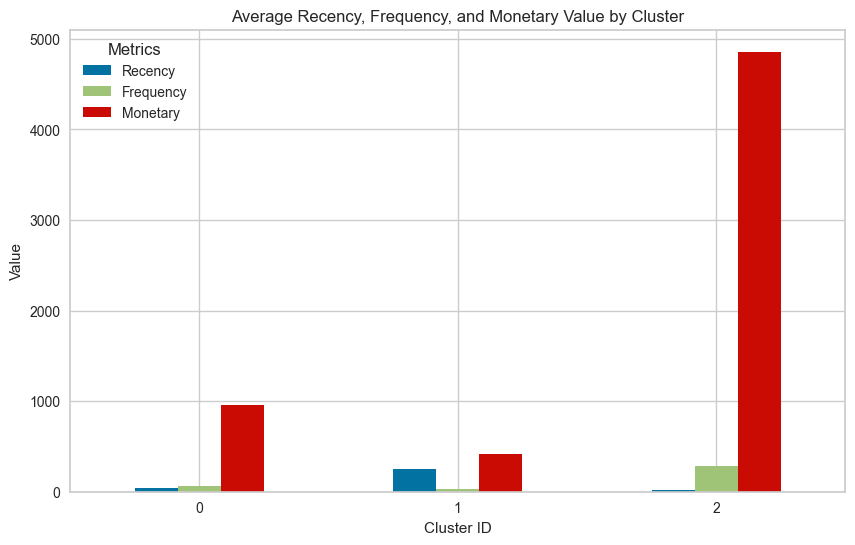

In [78]:
# Group by Cluster_ID and calculate mean values
cluster_means = rfm_df.groupby('Cluster_ID').mean()

# Plotting bar chart
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Recency, Frequency, and Monetary Value by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

## STEP 6: Evaluation

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

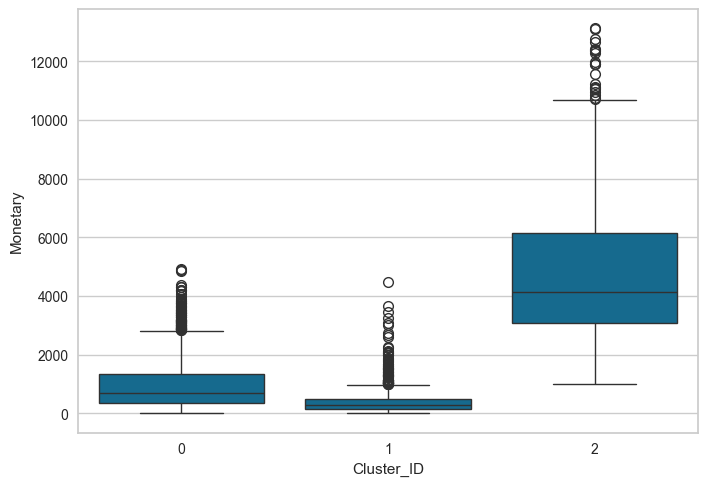

In [79]:
sns.boxplot(x='Cluster_ID', y='Monetary', data=rfm_df)

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

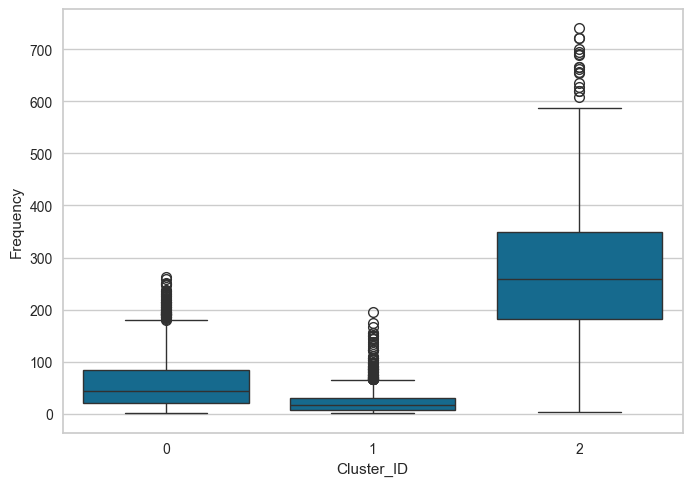

In [80]:
sns.boxplot(x='Cluster_ID', y='Frequency', data=rfm_df)

<Axes: xlabel='Cluster_ID', ylabel='Recency'>

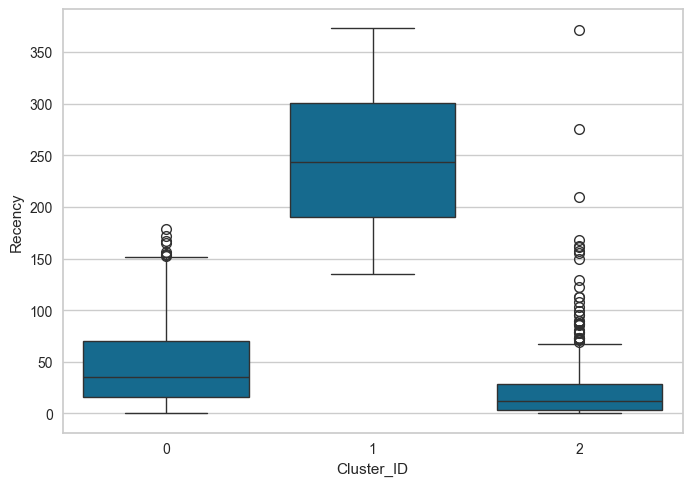

In [81]:
sns.boxplot(x='Cluster_ID', y='Recency', data=rfm_df)

C:\Users\dangq\AppData\Local\Temp\ipykernel_8092\3038553323.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dangq\AppData\Local\Temp\ipykernel_8092\3038553323.py:3: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



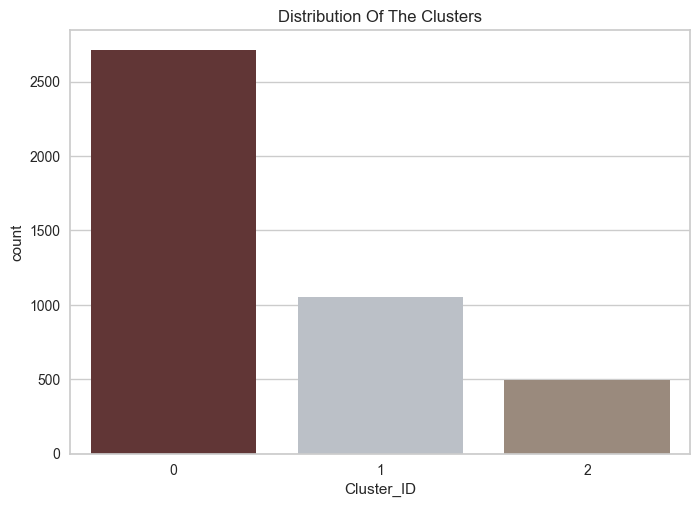

In [82]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=rfm_df["Cluster_ID"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [83]:
Cluster_id_0 = rfm_df[rfm_df['Cluster_ID']==0]
Cluster_id_0

,Recency,Frequency,Monetary,Cluster_ID
2,74,31,1797.24,0
3,18,73,1757.55,0
5,35,85,2385.71,0
9,22,59,2811.43,0
11,1,19,1168.06,0
...,...,...,...,...
4331,43,14,329.61,0
4332,57,8,110.38,0
4333,73,9,173.90,0
4336,7,12,176.60,0


In [85]:
# Loop through each unique Cluster_ID in the dataset
for cluster_id in rfm_df['Cluster_ID'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = rfm_df[rfm_df['Cluster_ID'] == cluster_id]
    
    # Calculate metrics for the current cluster
    cluster_users = cluster_data['Cluster_ID'].count()
    avg_time = cluster_data['Recency'].mean()
    avg_activity = cluster_data['Frequency'].mean()
    avg_spend = cluster_data['Monetary'].mean()
    
    # Print the summary for the current cluster
    print(f"Cluster {cluster_id} Summary:")
    print(f"- Number of Users: {cluster_users}")
    print(f"- Average Recency: {avg_time:.2f}")
    print(f"- Average Frequency: {avg_activity:.2f}")
    print(f"- Average Spend: {avg_spend:.2f}")
    print("\n")  # Add a new line for readability between clusters



Cluster 1 Summary:
- Number of Users: 1054
- Average Recency: 248.05
- Average Frequency: 25.25
- Average Spend: 417.02


Cluster 2 Summary:
- Number of Users: 494
- Average Recency: 22.91
- Average Frequency: 278.62
- Average Spend: 4858.39


Cluster 0 Summary:
- Number of Users: 2710
- Average Recency: 45.50
- Average Frequency: 57.93
- Average Spend: 954.67




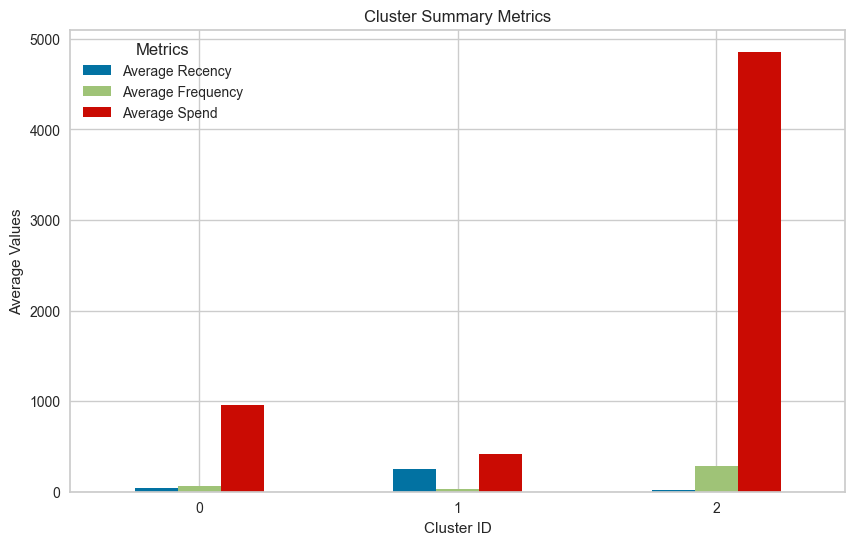

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store cluster summaries
cluster_summaries = []

# Loop through each unique Cluster_ID in the dataset
for cluster_id in rfm_df['Cluster_ID'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = rfm_df[rfm_df['Cluster_ID'] == cluster_id]
    
    # Calculate metrics for the current cluster
    cluster_users = cluster_data['Cluster_ID'].count()
    avg_time = cluster_data['Recency'].mean()
    avg_activity = cluster_data['Frequency'].mean()
    avg_spend = cluster_data['Monetary'].mean()

    # Append the summary as a dictionary to the list
    cluster_summaries.append({
        'Cluster_ID': cluster_id,
        'Number of Users': cluster_users,
        'Average Recency': avg_time,
        'Average Frequency': avg_activity,
        'Average Spend': avg_spend
    })

# Convert the list to a DataFrame for easier plotting
summary_df = pd.DataFrame(cluster_summaries)

# Set the cluster ID as the index for better plotting
summary_df = summary_df.sort_values(by='Cluster_ID').set_index('Cluster_ID')

# Plotting a grouped bar plot
summary_df[['Average Recency', 'Average Frequency', 'Average Spend']].plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Summary Metrics')
plt.xlabel('Cluster ID')
plt.ylabel('Average Values')
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()


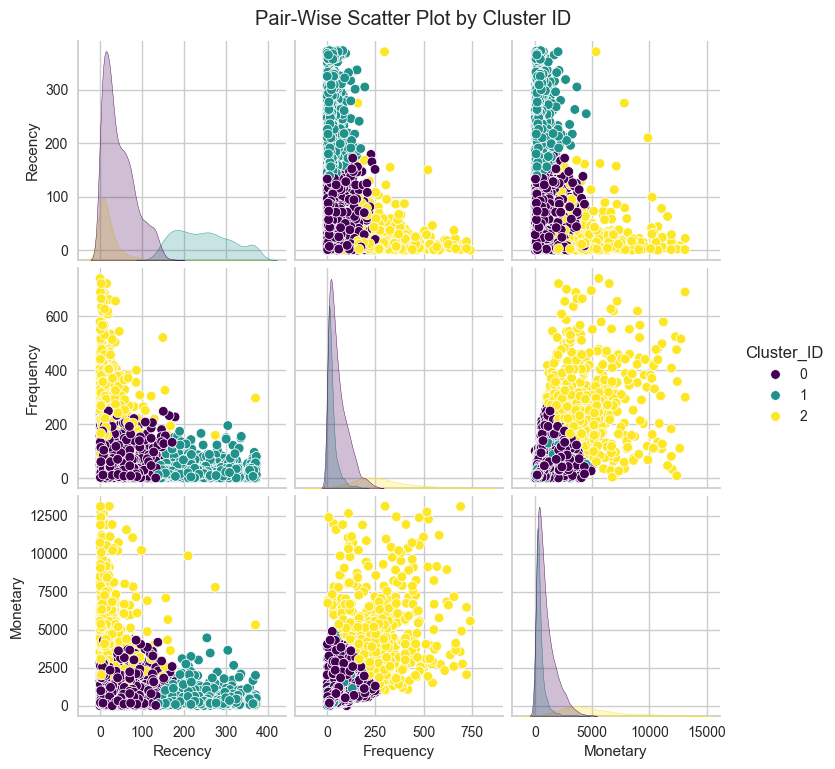

In [87]:
sns.pairplot(rfm_df, vars=['Recency', 'Frequency', 'Monetary'], hue='Cluster_ID', palette='viridis')
plt.suptitle("Pair-Wise Scatter Plot by Cluster ID", y=1.02)
plt.show()

In [88]:
segmentation = rfm_score_cleaned.merge(rfm_df, on="Recency")
segmentation

,CustomerID,Recency,Frequency_x,Monetary_x,Recency_Score,Frequency_Score,Monetary_Score,RFM_SCORE,Segment,Frequency_y,Monetary_y,Cluster_ID
0,12346.0,325,1,0.00,1,1,1,111,Lost,1,0.00,1
1,12346.0,325,1,0.00,1,1,1,111,Lost,28,201.16,1
2,12346.0,325,1,0.00,1,1,1,111,Lost,12,155.93,1
3,12346.0,325,1,0.00,1,1,1,111,Lost,8,146.85,1
4,12346.0,325,1,0.00,1,1,1,111,Lost,7,107.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...
139685,18287.0,42,70,1837.28,3,4,4,344,Loyal Customers,111,657.30,0
139686,18287.0,42,70,1837.28,3,4,4,344,Loyal Customers,141,642.32,0
139687,18287.0,42,70,1837.28,3,4,4,344,Loyal Customers,68,3406.72,0
139688,18287.0,42,70,1837.28,3,4,4,344,Loyal Customers,21,324.24,0


In [89]:
segmentation_counts = pd.DataFrame(segmentation[["Segment", "Cluster_ID"]].groupby(["Cluster_ID", "Segment"])["Segment"].agg("count"))
segmentation_counts 

Segment
Cluster_ID Segment                             
0          About To Sleep                  2865
           At Risk                         2905
           Can't Lose Them                  183
           Champions                      34993
           Customers Needing Attention     8355
           Hibernating                     6971
           Loyal Customers                12464
           Potential Loyalist             18424
           Promising                       6296
           Recent Customers               11092
1          About To Sleep                   166
           At Risk                         1310
           Can't Lose Them                  464
           Hibernating                     3139
           Lost                            2432
2          About To Sleep                   174
           At Risk                          177
           Can't Lose Them                   14
           Champions                      13794
           Customers Needing Attention     1928
           Hibernating                      376
           Lost                              11
           Loyal Customers                 2115
           Potential Loyalist              4408
           Promising                       2130
           Recent Customers                2504

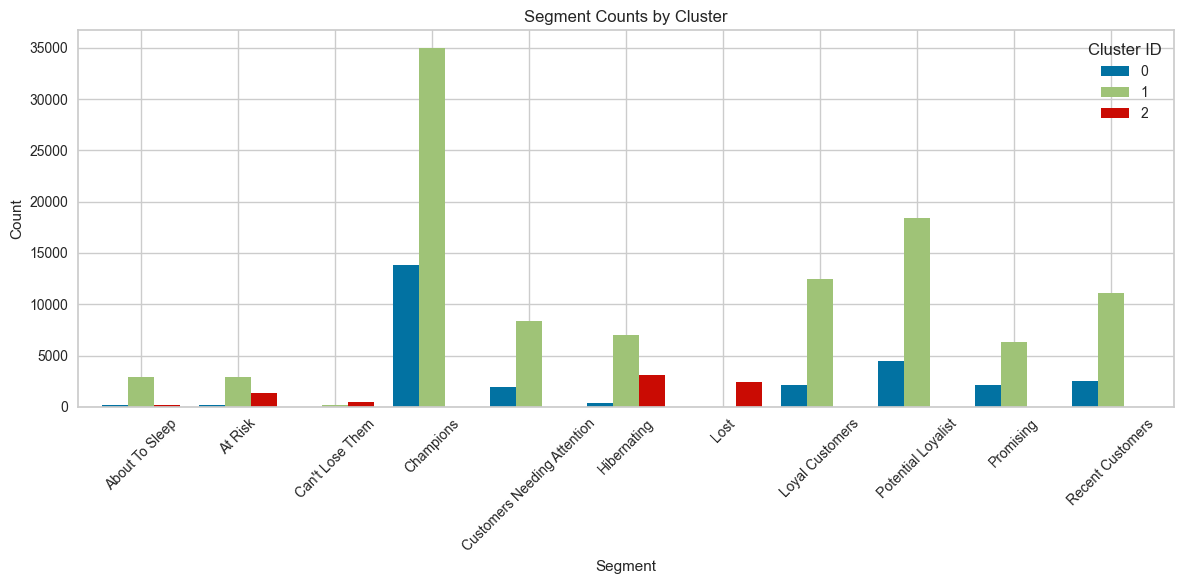

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data from segmentation_counts based on the provided table
data = {
    'Cluster_ID': [0] * 11 + [1] * 10 + [2] * 5,
    'Segment': [
        "About To Sleep", "At Risk", "Can't Lose Them", "Champions", "Customers Needing Attention",
        "Hibernating", "Lost", "Loyal Customers", "Potential Loyalist", "Promising", "Recent Customers",
        "About To Sleep", "At Risk", "Can't Lose Them", "Champions", "Customers Needing Attention",
        "Hibernating", "Loyal Customers", "Potential Loyalist", "Promising", "Recent Customers",
        "About To Sleep", "At Risk", "Can't Lose Them","Hibernating", "Lost"
    ],
    'Count': [
        176, 179, 14, 13836, 1937, 379, 11, 2128, 4420, 2140, 2511,
        2863, 2903, 183, 34951, 8346, 6968, 12451, 18412, 6286, 11085,
        166, 1310, 464, 3139, 2432
    ]
}

# Create DataFrame
segmentation_counts = pd.DataFrame(data)

# Pivot data for plotting
pivot_counts = segmentation_counts.pivot(index='Segment', columns='Cluster_ID', values='Count').fillna(0)

# Plotting
pivot_counts.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Segment Counts by Cluster')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster ID')
plt.tight_layout()
plt.show()
